In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = r"C:\Users\Martijn\Downloads\archive\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)

In [38]:
# Crosstab Analysis:

# Create a crosstab between the product category and the isBestSeller status.

# Are there categories where being a best-seller is more prevalent?

df_crosstab = pd.crosstab(df["category"], df.isBestSeller)
df_crosstab.sort_values(by=True, ascending=False).head(5)


isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306


In [27]:
df_crosstab_normalized = df_crosstab.apply(lambda x: x / x.sum(), axis=1).sort_values(by=True, ascending=True)
df_crosstab_normalized

isBestSeller,False,True
category,,
eBook Readers & Accessories,1.000000,0.000000
Boxes & Organisers,1.000000,0.000000
"CD, Disc & Tape Players",1.000000,0.000000
CPUs,1.000000,0.000000
Snowboard Boots,1.000000,0.000000
...,...,...
Power & Hand Tools,0.964661,0.035339
Mobile Phone Accessories,0.957529,0.042471
Health & Personal Care,0.942314,0.057686


In [ ]:
# Statistical Tests:

# Conduct a Chi-square test to determine if the
#  best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency

In [31]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [36]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(df_crosstab)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [ ]:
# Compute Cramér's V to understand the strength of association between 
# best-seller status and category.

from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(df_crosstab, method="cramer")

0.1222829439760564

In [45]:
df_filtered = df[df["price"]>50]

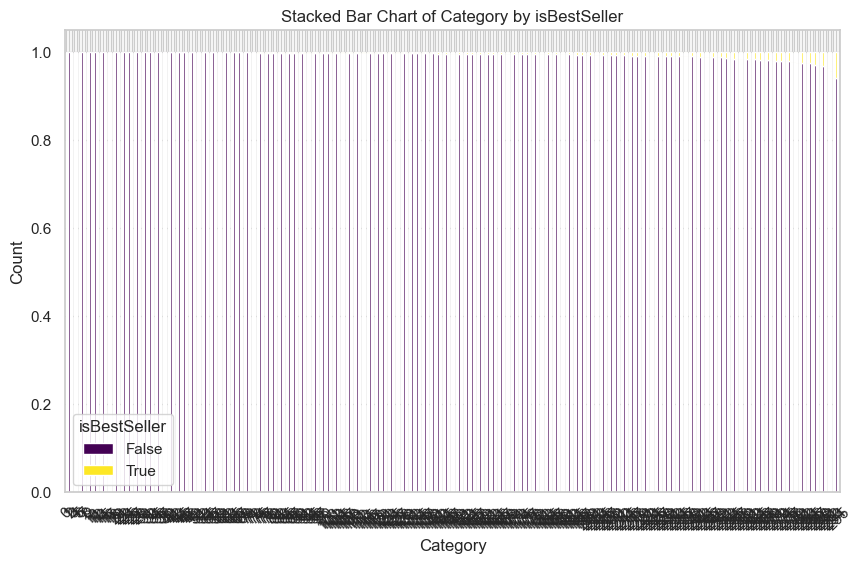

In [64]:
df_crosstab_normalized.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Category by isBestSeller")
plt.legend(title="isBestSeller")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

## Part 2

In [76]:
# Preliminary Step: Remove outliers in product prices.

# For this purpose, we can use the IQR (Interquartile Range) method. 
# Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times 
# the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

# Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

quantiles = df.price.quantile([0.25, 0.75])
quantile1 = quantiles[0.25]
quantile2 = quantiles[0.75]

iqr = quantile2 - quantile1

df_no_outlier = df[(df["price"]< 1.5 * iqr + quantile2) & (df["price"]> -1.5 * iqr +quantile1)]

<Axes: xlabel='price', ylabel='Count'>

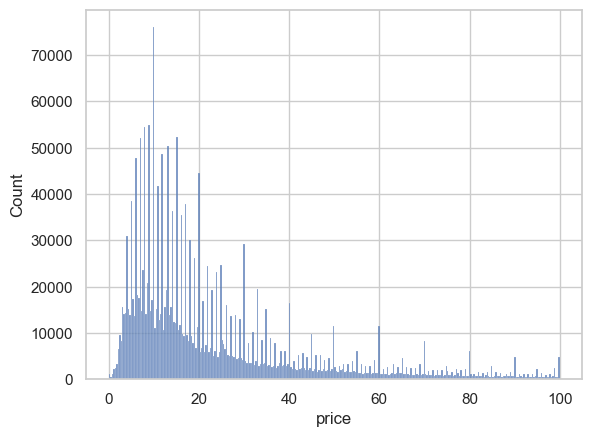

In [ ]:
sns.histplot(df_no_outlier, x="price")

In [87]:
df_20_largest = df_no_outlier.groupby("category")["category"].count().nlargest(20)
largest_20 = list(df_20_largest.index)


In [90]:
df_no_outlier_filter = df_no_outlier[df_no_outlier["category"].isin(largest_20)]

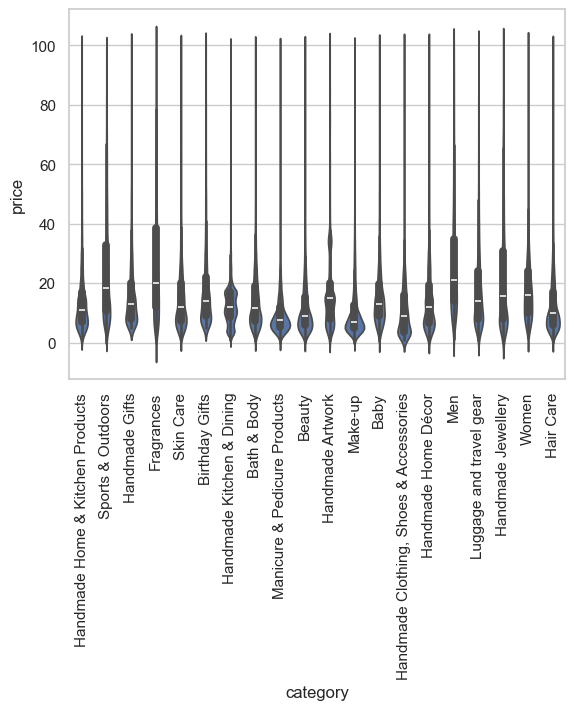

<Figure size 20000x800 with 0 Axes>

In [98]:
# Violin Plots:

# Use a violin plot to visualize the distribution of price across different product categories. 
# Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.

sns.violinplot(df_no_outlier_filter, x="category", y="price")
plt.xticks(rotation=90)  # Rotate x labels to vertical
plt.figure(figsize=(200, 8))
plt.show()

In [99]:
# Bar Charts:

# Create a bar chart comparing the average price of products for the top 10 
# product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.

df_10_largest = df_no_outlier.groupby("category")["category"].count().nlargest(10)
largest_10 = list(df_10_largest.index)
df_no_outlier_filter10 = df_no_outlier[df_no_outlier["category"].isin(largest_10)]

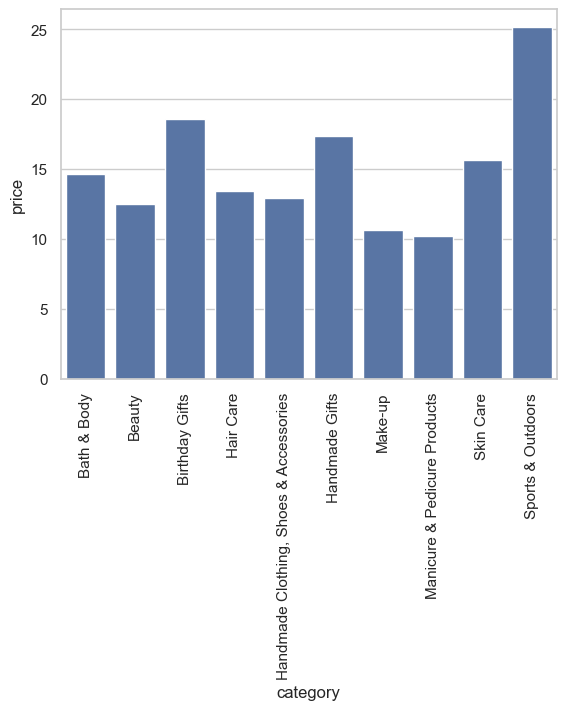

In [112]:
df_no_outlier_filter10_grouped = df_no_outlier_filter10.groupby("category")[["price"]].mean()
sns.barplot(df_no_outlier_filter10_grouped, x="category", y="price")
plt.xticks(rotation=90)  # Rotate x labels to vertical
plt.show()

In [113]:
df_no_outlier.groupby("category")["price"].mean().idxmax()

'Motherboards'

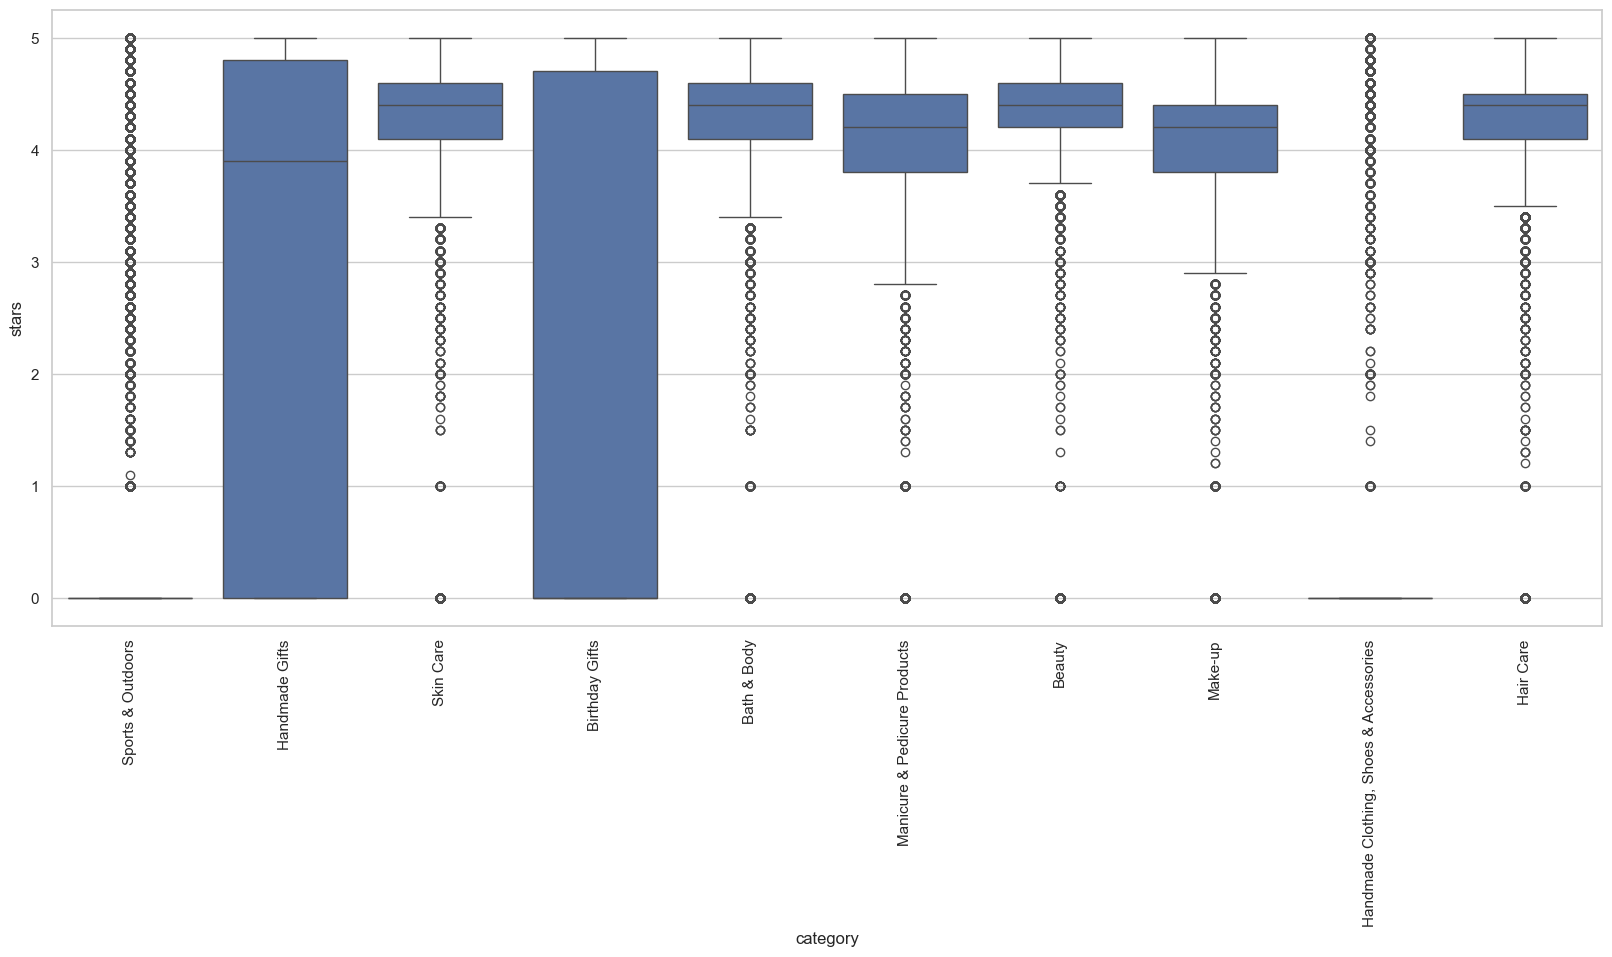

In [130]:
# Box Plots:

# Visualize the distribution of product ratings based on their category using side-by-side box plots.
#  Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? 
# Don't filter here by top categories.

df_no_outlier_filter10
plt.figure(figsize=(20,8))
sns.boxplot(data=df_no_outlier_filter10, y="stars", x="category")
#plt.legend(title="Category", loc='lower right')
plt.xticks(rotation=90)  # Rotate x labels to vertical
plt.show()

In [ ]:

# Part 3: Investigating the Interplay Between Product Prices and Ratings
# Objective: Analyze how product ratings (stars) correlate with product prices.

# Correlation Coefficients:

# Calculate the correlation coefficient between price and stars.
# Is there a significant correlation between product price and its rating?

df_no_outlier.stars.corr(df.price) # slightly negative but not really significant


-0.0776729987818137

In [ ]:
df_no_outlier_no0 = df_no_outlier[df_no_outlier.stars != 0]
df_no_outlier_no0.stars.corr(df.price) # when filtering 0 out, still irrelevant

0.0067445080671580315

<function matplotlib.pyplot.show(close=None, block=None)>

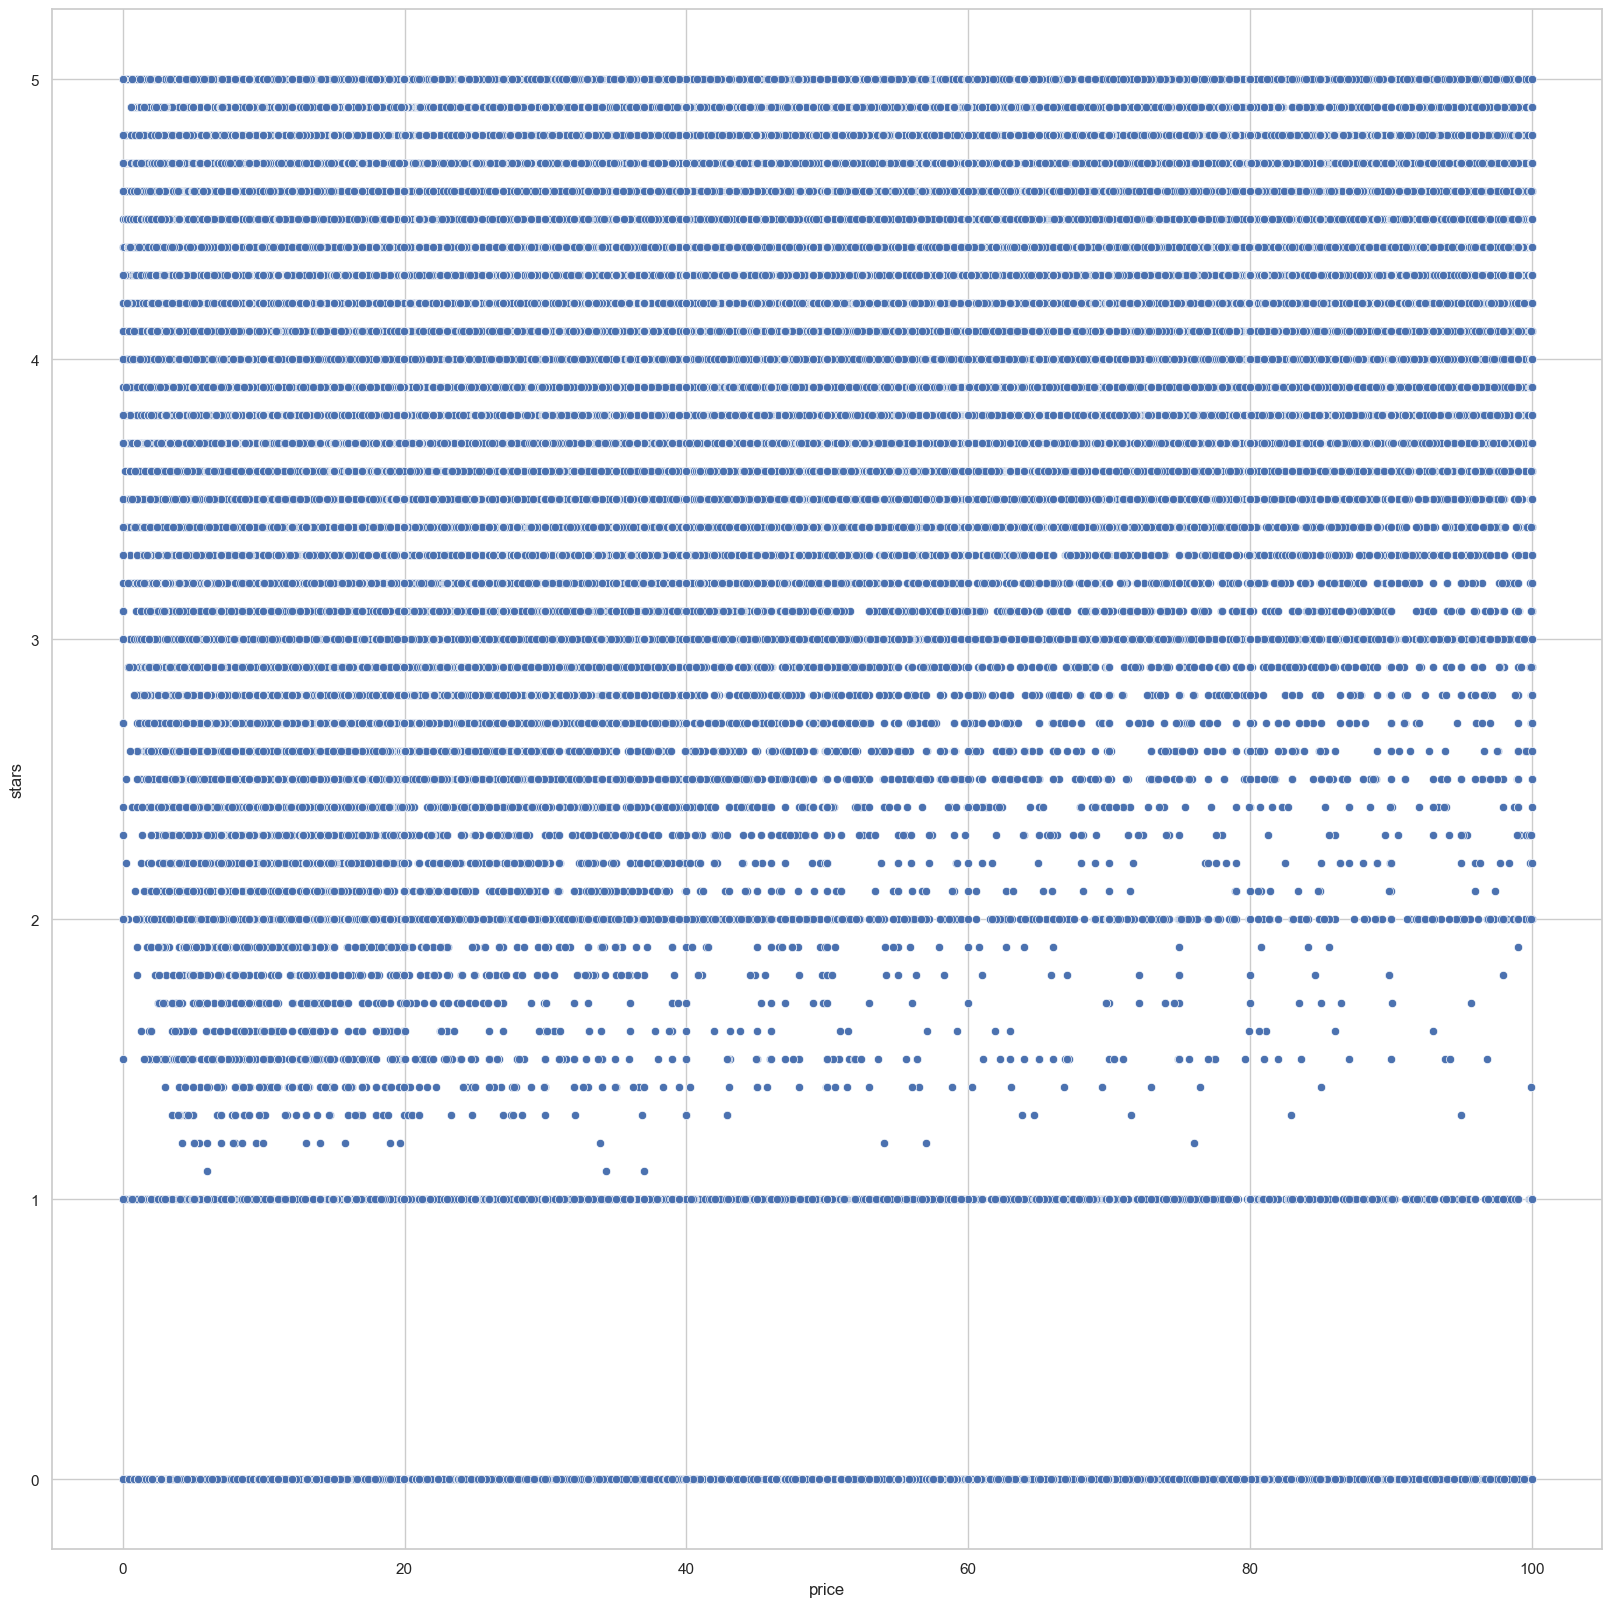

In [ ]:
# Visualizations:

# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?


plt.figure(figsize=(20,20))
sns.scatterplot(df_no_outlier, x="price", y="stars")
plt.show

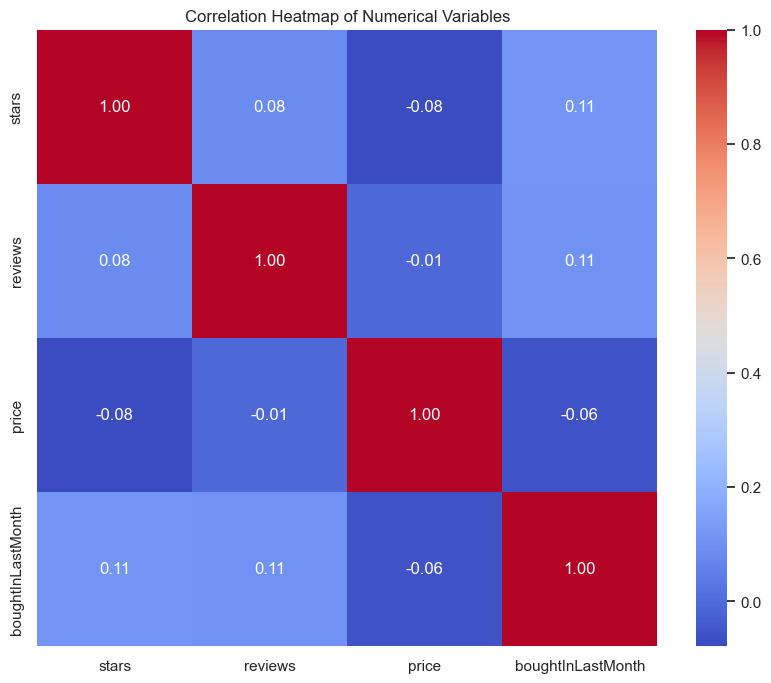

In [145]:
# Use a correlation heatmap to visualize correlations between all numerical variables.
df_numeric = df_no_outlier.select_dtypes("number")
df_numeric = df_numeric.drop(columns="uid")
corr_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


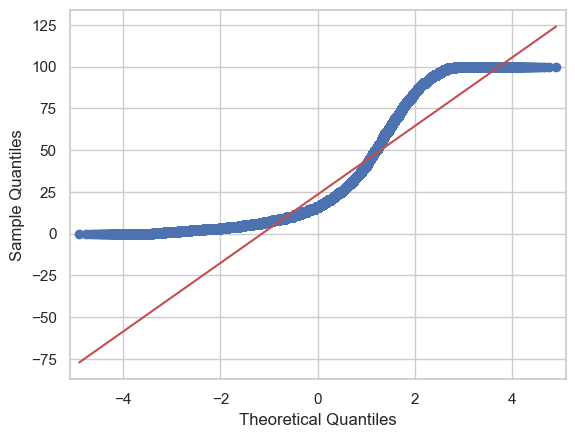

In [147]:
# Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df_no_outlier['price'], line='s');